# HW7
## Mike Henry

In [243]:
%matplotlib inline
from IPython.display import HTML
from __future__ import division
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
import numpy as np
import scipy
from scipy import stats
import pandas
import cf
from cf import *
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
TEST The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [232]:
def mos_law_beta(Z):
    return ((8/9)*3e8*1.097e7*(Z-1)**2)**(1/2)


Z = [10, 15, 20, 25, 30, 35, 40, 45, 50]
energy = [0.86, 2.14, 4.02, 6.51, 9.57, 13.30, 17.70, 22.80, 28.4]
energy = np.array(energy)
frequency_root = (energy*1e3/4.135e-15)**(1/2)
mos = []
for _ in Z:
    mos.append(mos_law_beta(_))

Theory: 1.84889530693e-08
Experiment: 1.84605330824e-08


/Users/mikehenry/miniconda3/lib/python3.5/site-packages/matplotlib/mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


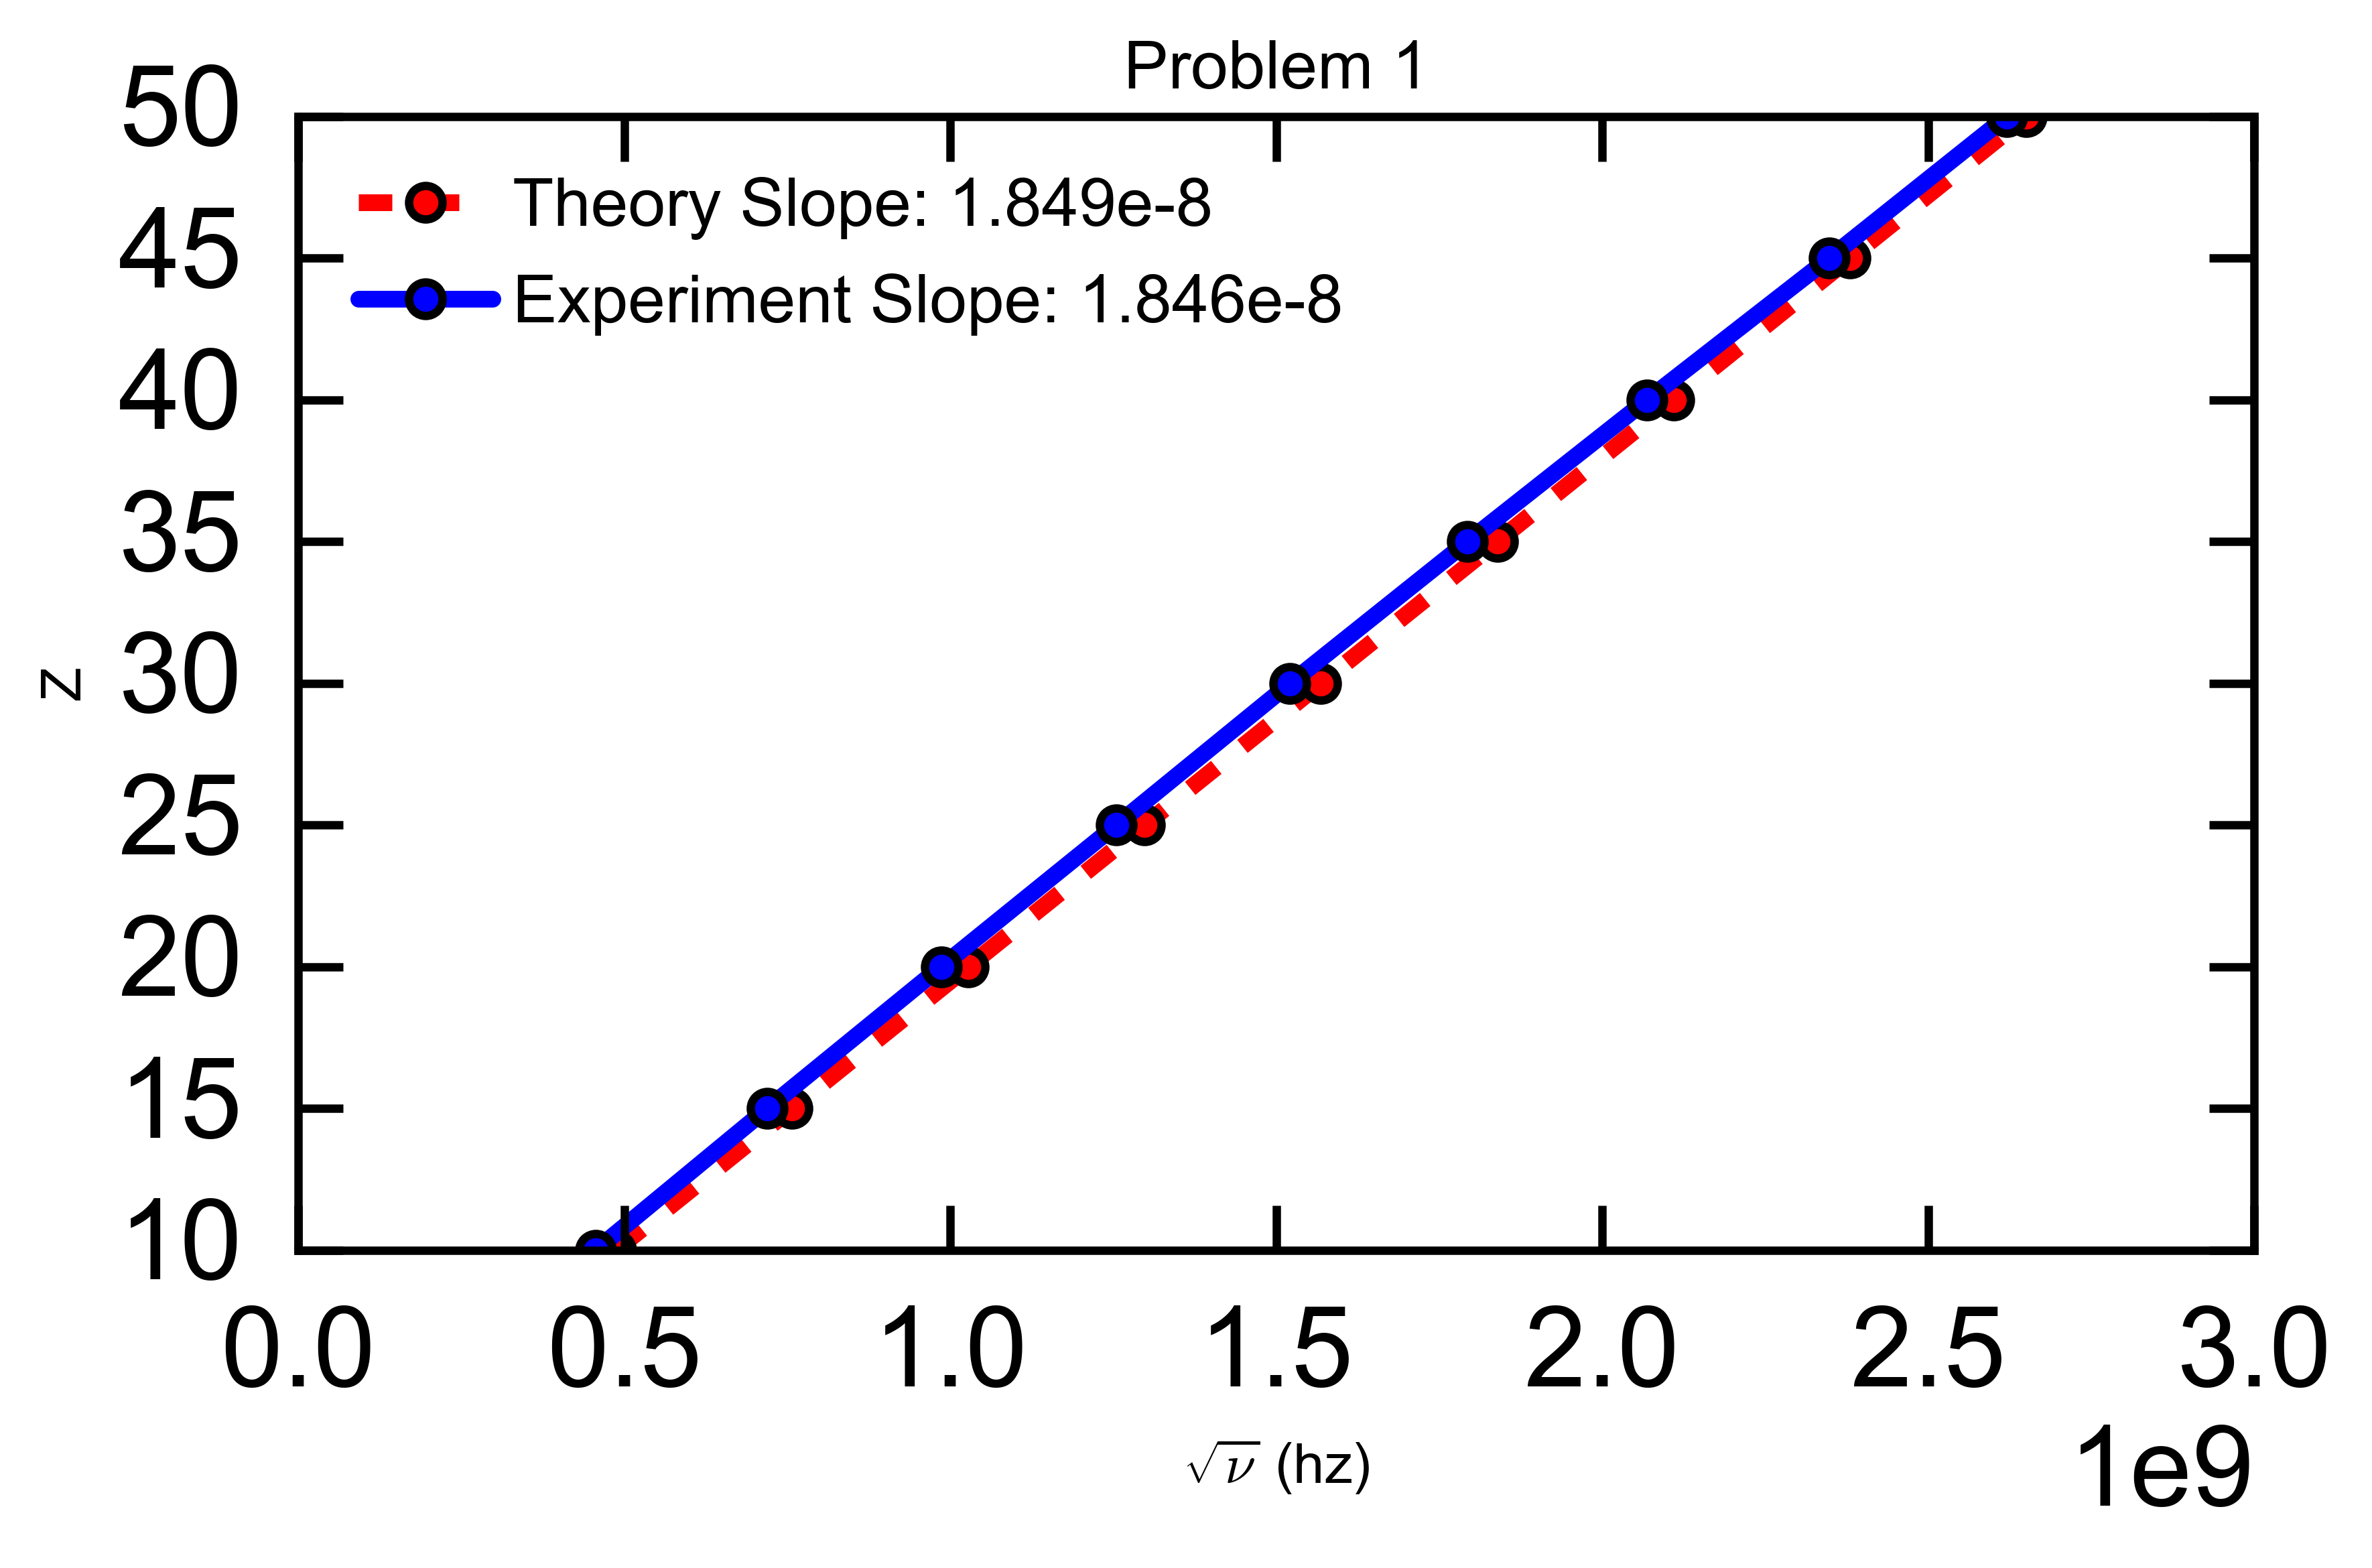

In [233]:
plt.plot(mos, Z, 'ro--', label="Theory Slope: 1.849e-8")
plt.plot(frequency_root, Z, 'bo-', label="Experiment Slope: 1.846e-8")
plt.legend(loc='upper left')
plt.title("Problem 1")
plt.xlabel(r"$\sqrt{\nu}$ (hz)")
plt.ylabel(r"Z")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mos,Z)
print("Theory:", slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(frequency_root,Z)
print("Experiment:", slope)

### Problem 2

Peak location: 6.915618171418629, Co Kα Transition
Peak location: 8.035556415719531, Cu Kα Transition
Peak location: 8.624315263059348, Zn Kα Transition
Peak location: 8.92053403810086, Cu Kβ Transition
Peak location: 9.558357307298865, Zn Kβ Transition


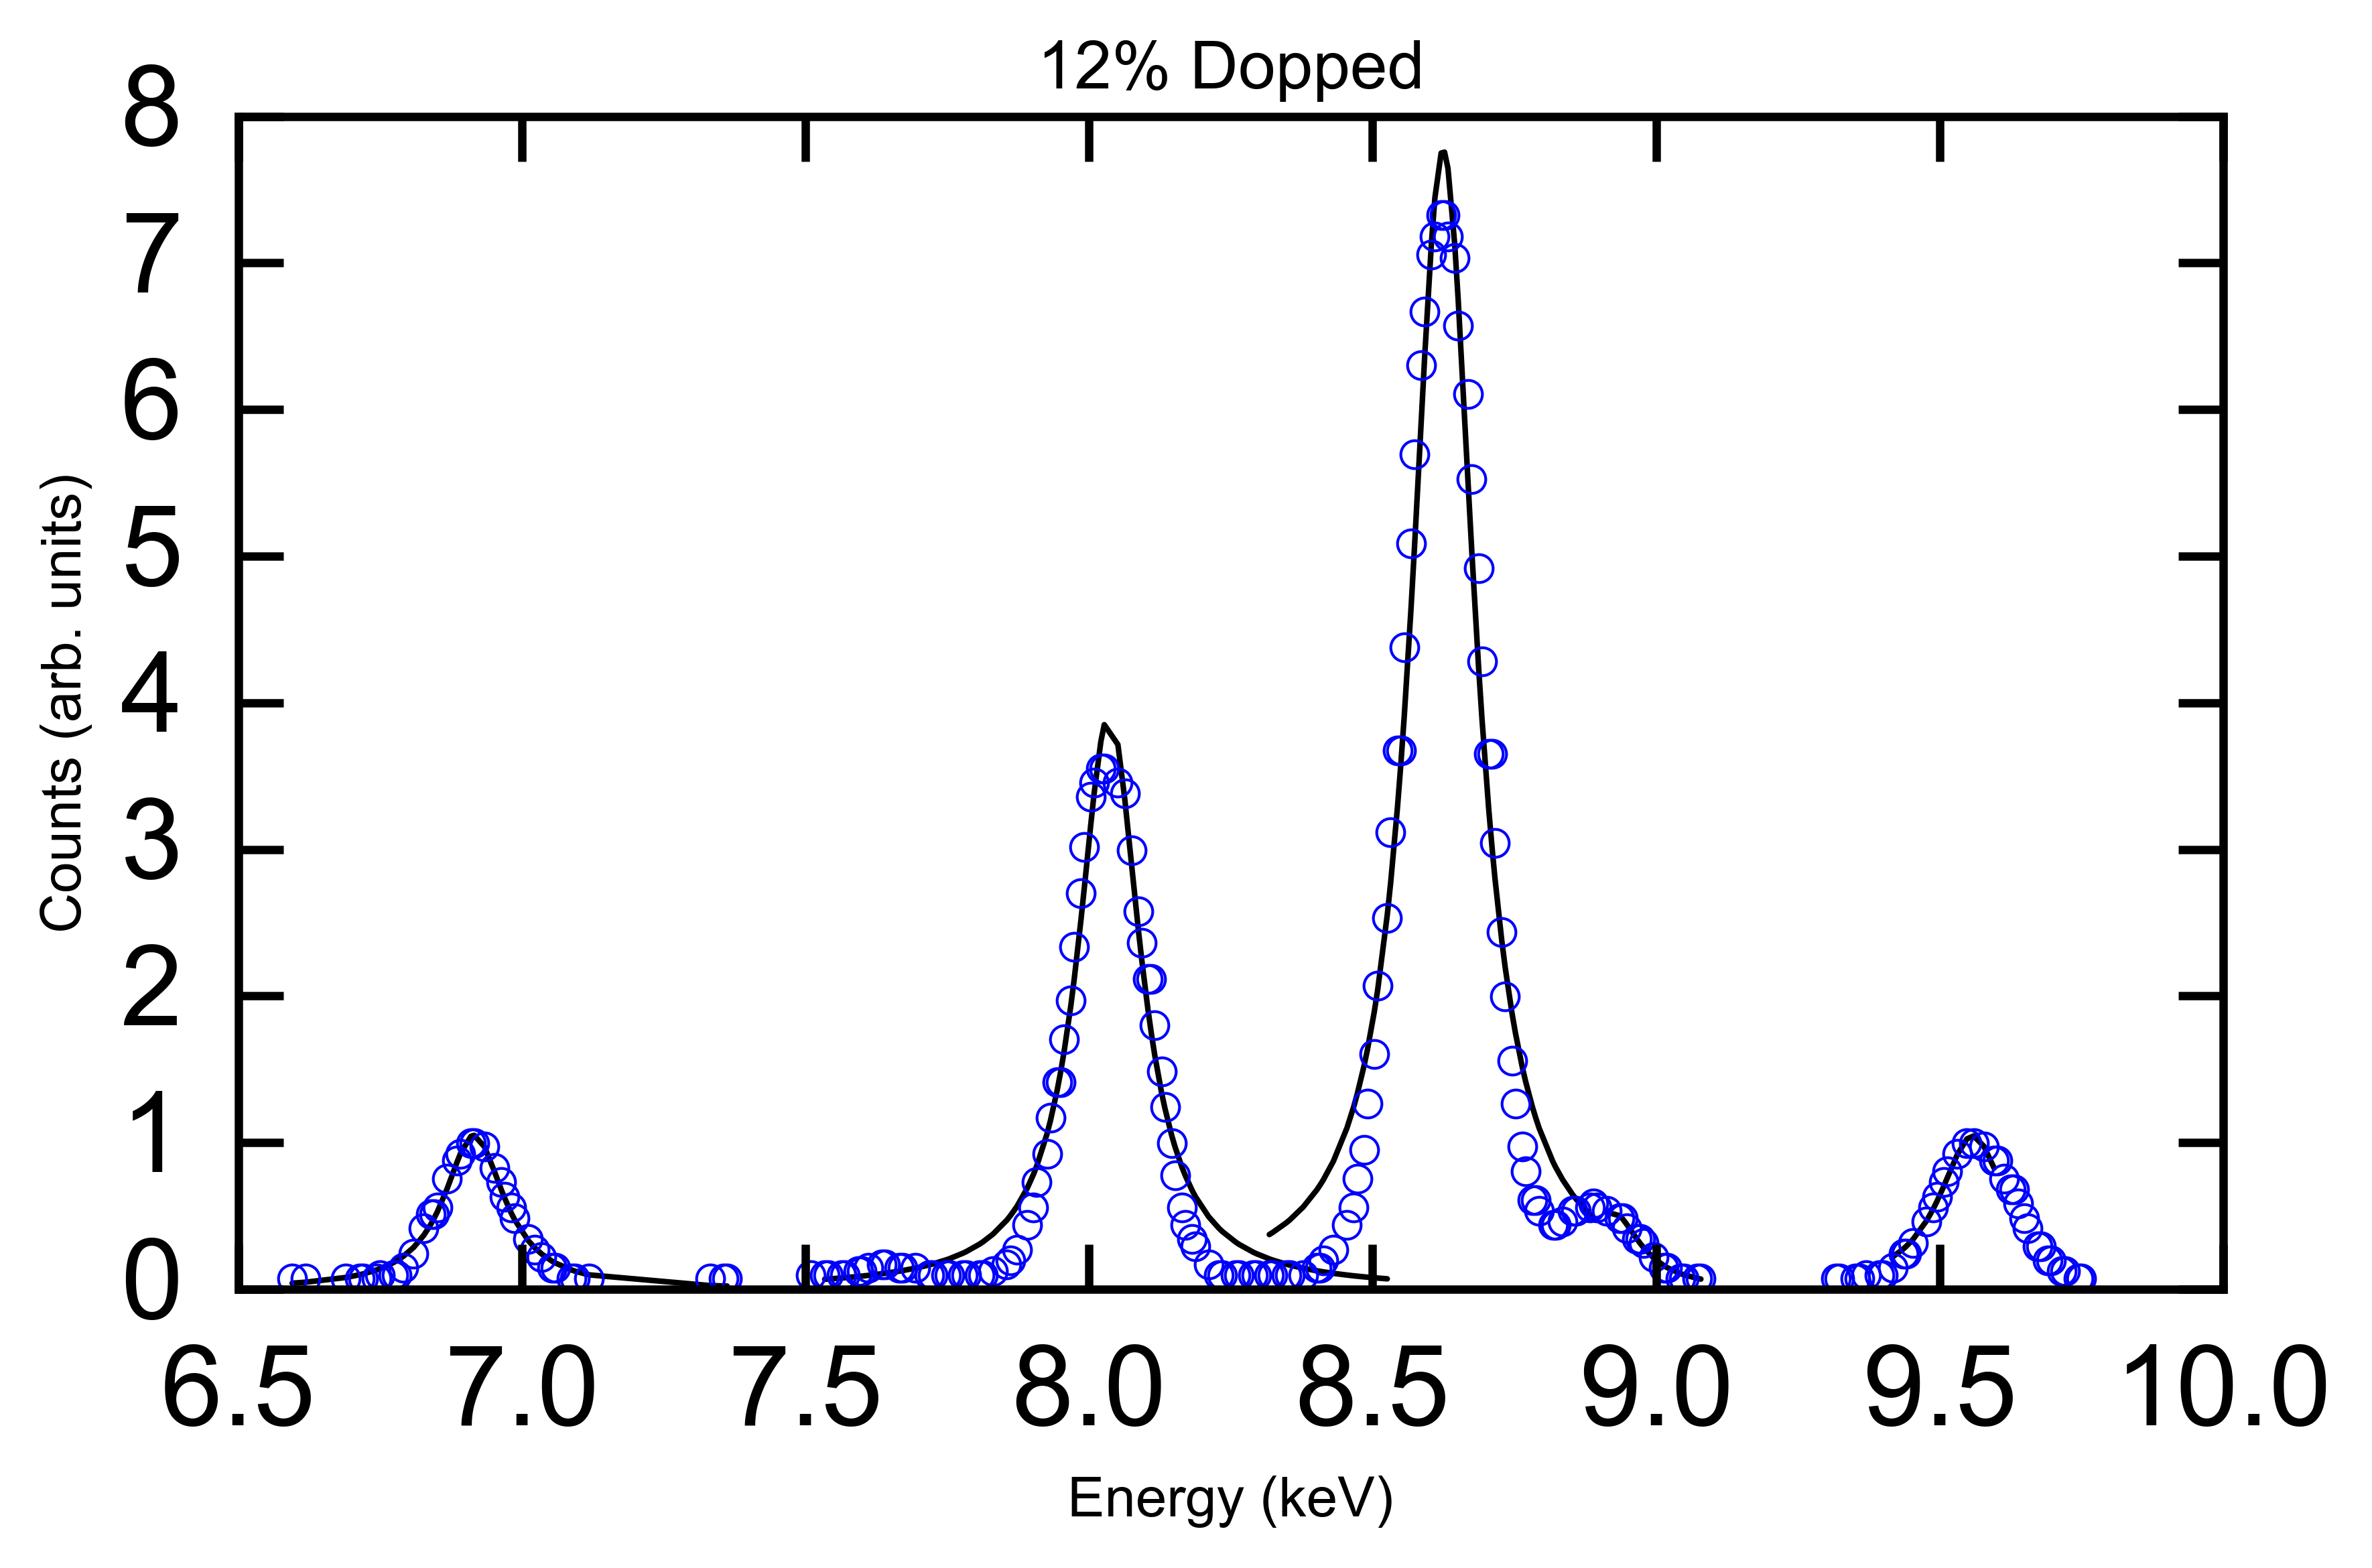

In [234]:
Co_12 = pandas.read_excel("12% Co.xls", skiprows=1)
Co_12_x = Co_12.as_matrix(columns=Co_12.columns[:1])
Co_12_y = Co_12.as_matrix(columns=Co_12.columns[1:])

x_r1 = np.array(Co_12_x).squeeze()
y_r1 = np.array(Co_12_y).squeeze()

p0 = sy.array([1, 0.05, 6.91])
delta = 0.5
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Co Kα Transition".format(popt[-1]))


p0 = sy.array([4, 0.05, 8.03])
delta = 0.5
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
print("Peak location: {}, Cu Kα Transition".format(popt[-1]))


p0 = sy.array([4, 0.05, 8.6])
delta = 0.3
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
print("Peak location: {}, Zn Kα Transition".format(popt[-1]))



p0 = sy.array([1, 0.05, 9.0])
delta = 0.1
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
print("Peak location: {}, Cu Kβ Transition".format(popt[-1]))


p0 = sy.array([1, 0.05, 9.5])
delta = 0.1
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
print("Peak location: {}, Zn Kβ Transition".format(popt[-1]))



plt.xlabel("Energy (keV)")
plt.ylabel("Counts (arb. units)")
plt.title("12% Dopped")
plt.plot(Co_12_x, Co_12_y, markerfacecolor='none', marker='o', color='b', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)

Peak location: 6.908426737816094, Co Kα Transition
Peak location: 8.02404298383303, Cu Kα Transition
Peak location: 8.62020459581064, Zn Kα Transition
Peak location: 8.880546464186175, Cu Kβ Transition
Peak location: 9.553297050314615, Zn Kβ Transition


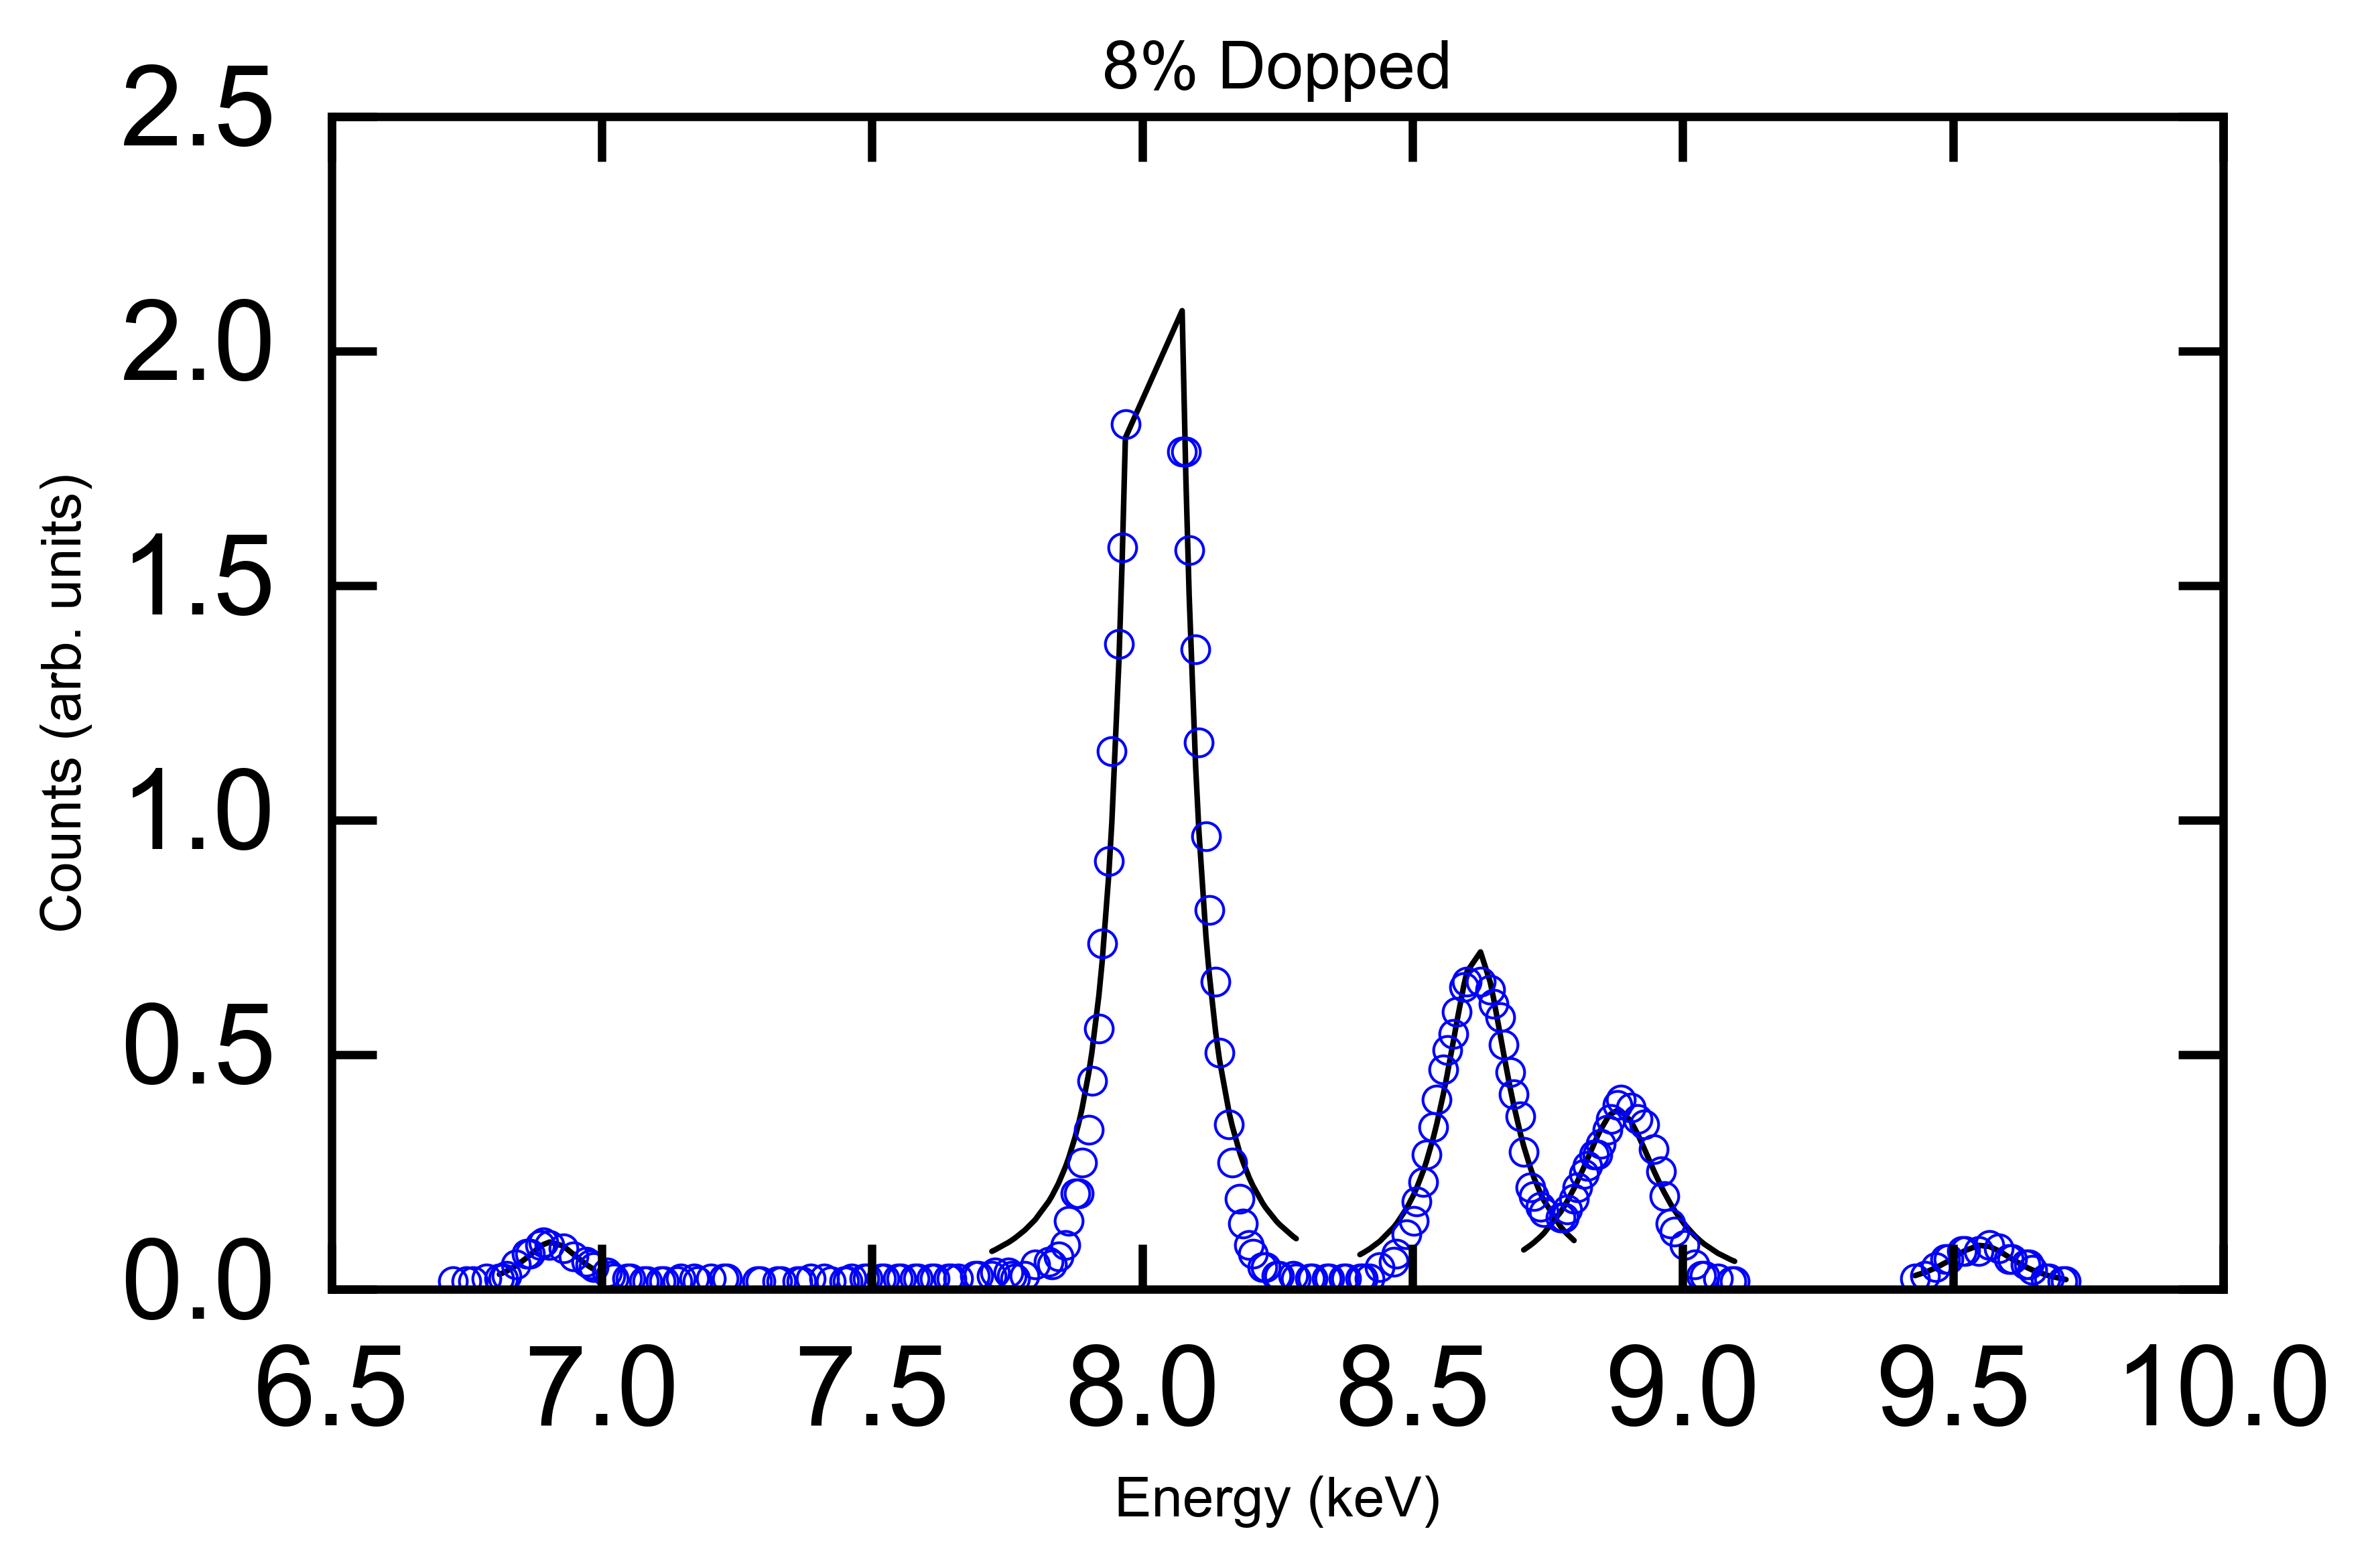

In [235]:
Co_8 = pandas.read_excel("8% Co.xls", skiprows=1)
Co_8_x = Co_8.as_matrix(columns=Co_8.columns[:1])
Co_8_y = Co_8.as_matrix(columns=Co_8.columns[1:])

x_r1 = np.array(Co_8_x).squeeze()
y_r1 = np.array(Co_8_y).squeeze()

p0 = sy.array([1, 0.05, 6.9])
delta = 0.1
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Co Kα Transition".format(popt[-1]))


p0 = sy.array([1, 0.05, 8])
delta = 0.3
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Cu Kα Transition".format(popt[-1]))


p0 = sy.array([1, 0.05, 8.6])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Zn Kα Transition".format(popt[-1]))

p0 = sy.array([1, 0.05, 8.9])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Cu Kβ Transition".format(popt[-1]))

p0 = sy.array([1, 0.05, 9.55])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Zn Kβ Transition".format(popt[-1]))

plt.xlabel("Energy (keV)")
plt.ylabel("Counts (arb. units)")
plt.title("8% Dopped")
plt.plot(Co_8_x, Co_8_y, markerfacecolor='none', marker='o', color='b', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)

Peak location: 8.029254621247198, Cu Kα Transition
Peak location: 8.619660801551772, Zn Kα Transition
Peak location: 8.886018881576522, Cu Kβ Transition
Peak location: 9.555257597020832, Zn Kβ Transition


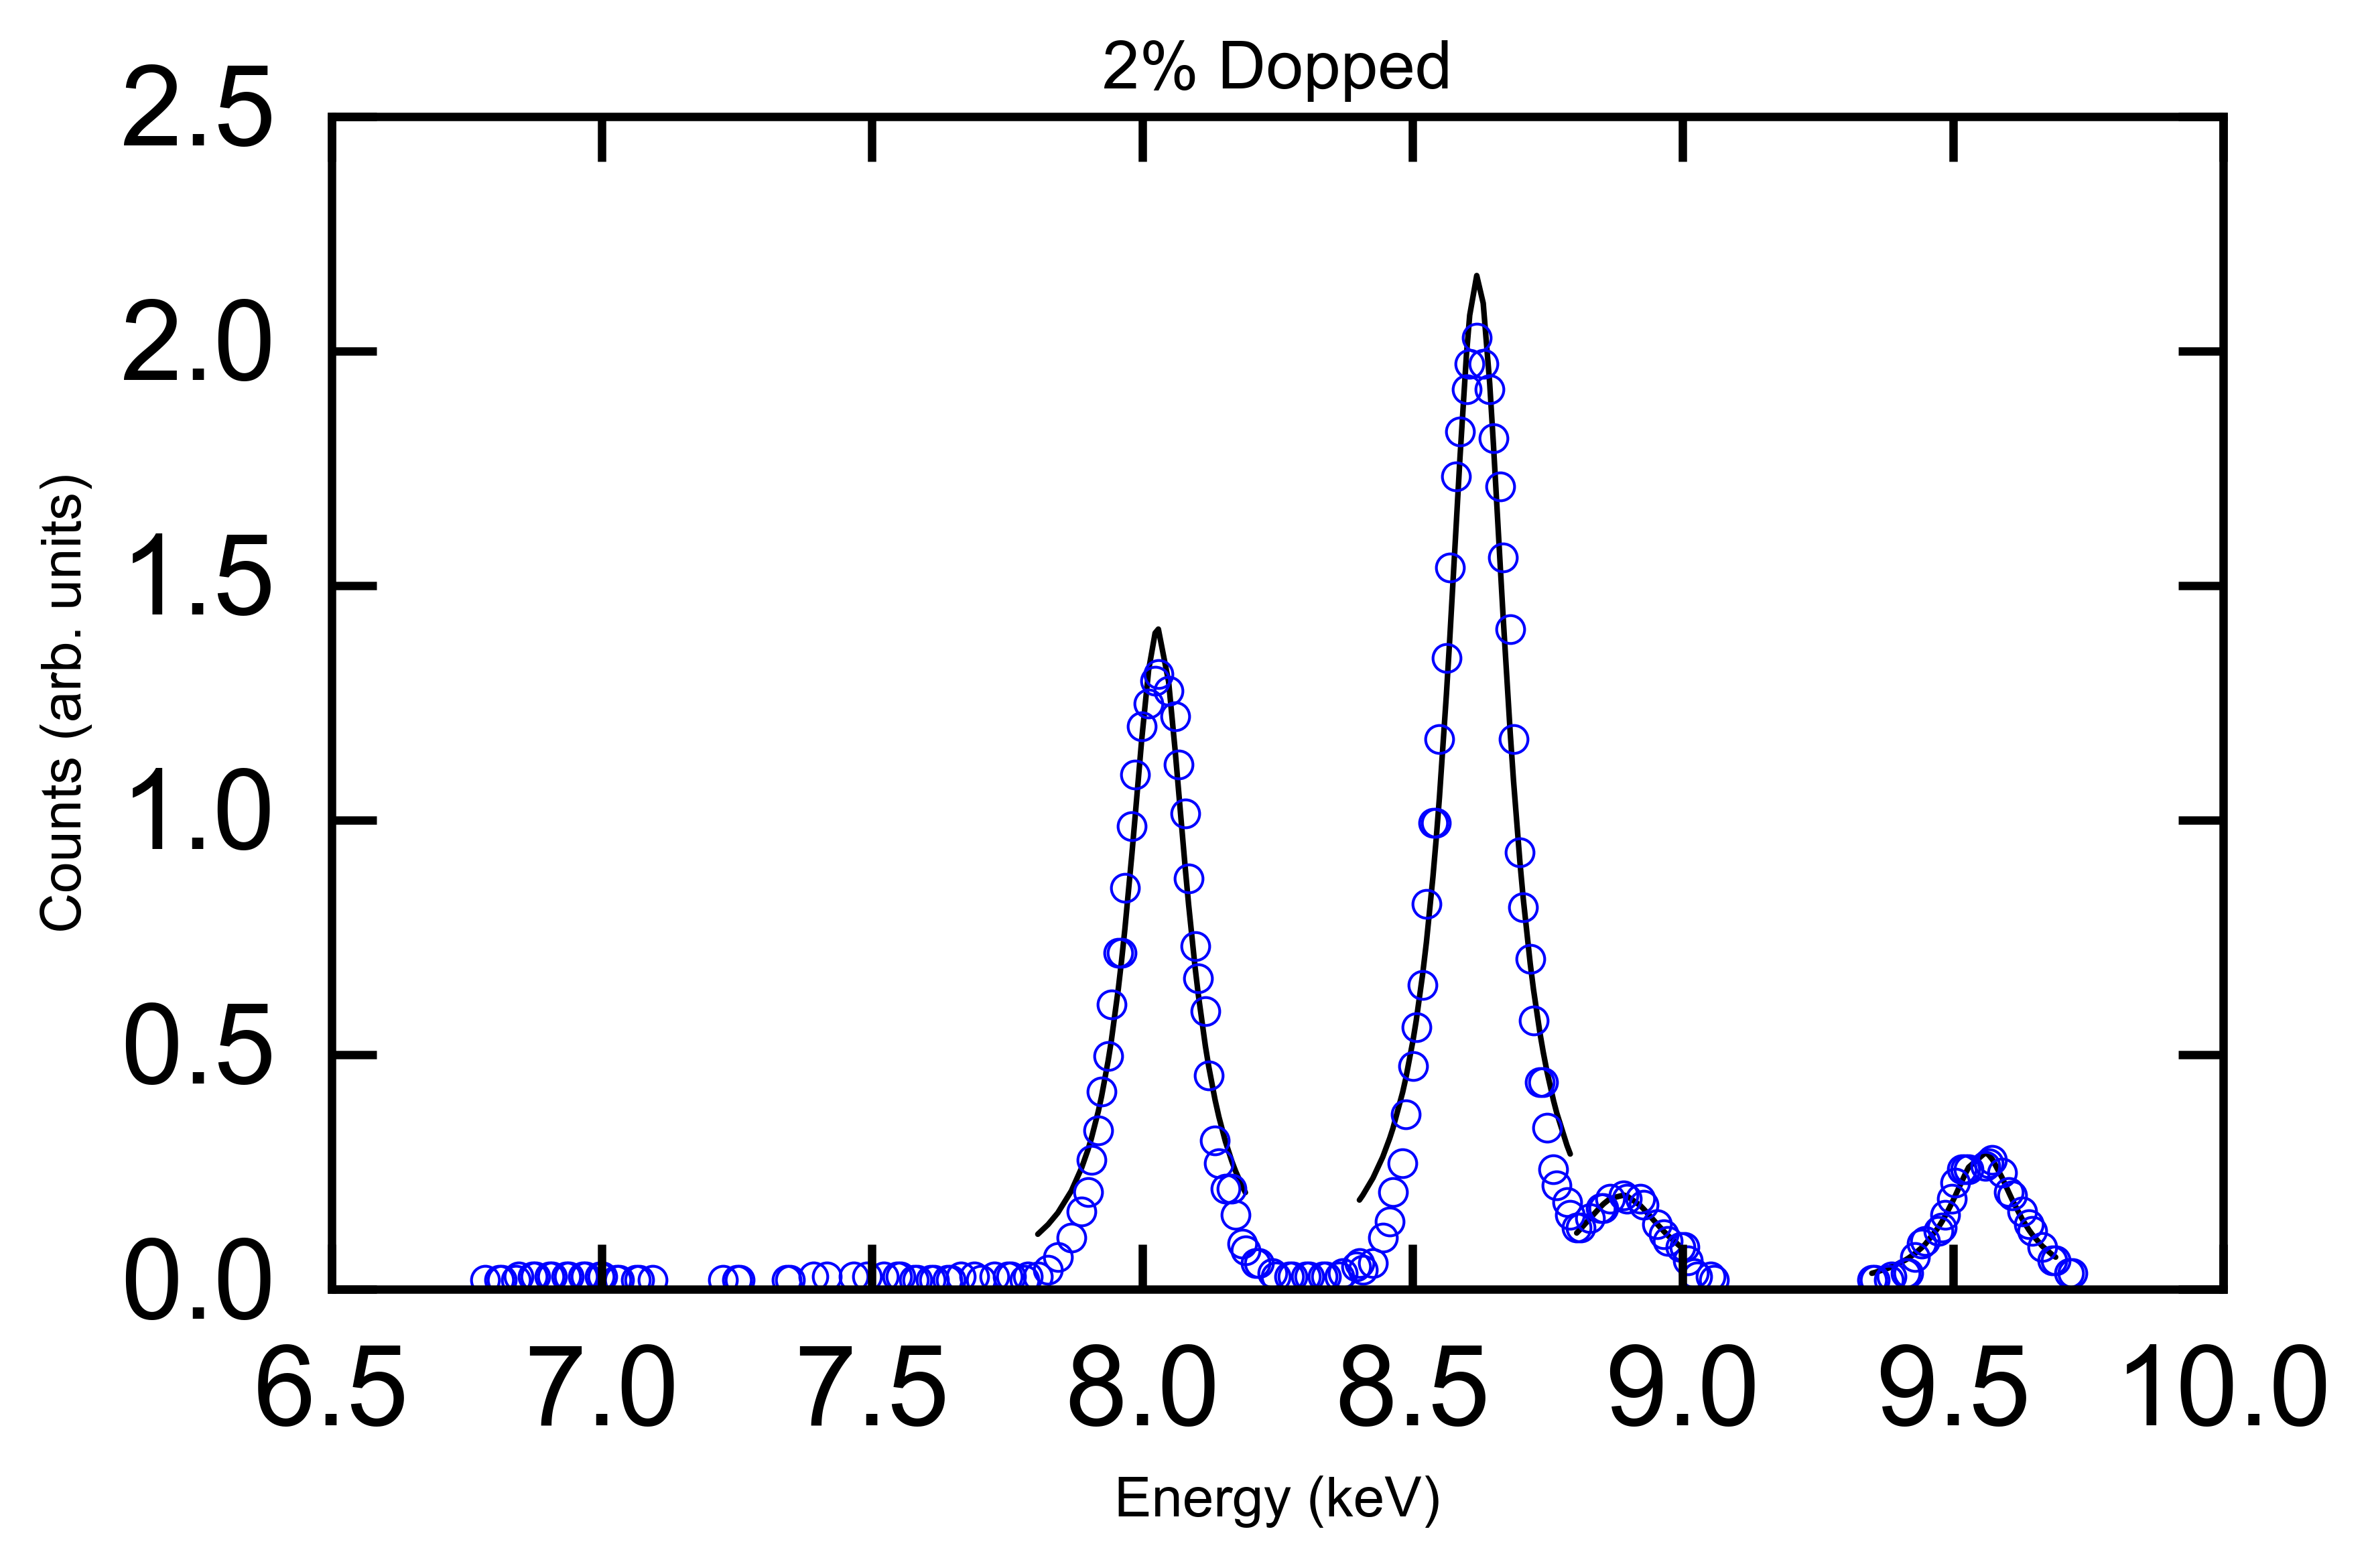

In [236]:
Co_2 = pandas.read_excel("2% Co.xls", skiprows=1)
Co_2_x = Co_2.as_matrix(columns=Co_2.columns[:1])
Co_2_y = Co_2.as_matrix(columns=Co_2.columns[1:])

x_r1 = np.array(Co_2_x).squeeze()
y_r1 = np.array(Co_2_y).squeeze()

p0 = sy.array([1, 0.05, 8.0])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Cu Kα Transition".format(popt[-1]))


p0 = sy.array([1, 0.05, 8.6])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Zn Kα Transition".format(popt[-1]))

p0 = sy.array([1, 0.05, 8.9])
delta = 0.1
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Cu Kβ Transition".format(popt[-1]))

p0 = sy.array([1, 0.05, 9.5])
delta = 0.2
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
plt.plot(x, y_fit, color='black', linewidth=1)
#print(popt)
print("Peak location: {}, Zn Kβ Transition".format(popt[-1]))


plt.xlabel("Energy (keV)")
plt.ylabel("Counts (arb. units)")
plt.title("2% Dopped")
plt.plot(Co_2_x, Co_2_y, markerfacecolor='none', marker='o', color='b', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)

### Problem 3

We can solve for thickness in the equation given, yeilding:

-ln(N_o/N_t)\*lam=t

In [237]:
'Thickness %.4E (nm)' % np.float(-1*np.log(1638464/3638478)*113)

'Thickness 9.0152E+01 (nm)'

### Problem 4


In [238]:
14986-1969

13017

In [239]:
10633-1401

9232

In [240]:
2.3*(9232/13017)

1.6312207113774295

So our C_a/C_b ratio is 1.63 and C_a + C_b = 1, we can solve for C_a and C_b

In [241]:
1/(1.63+1)

0.3802281368821293

In [242]:
1-0.3802281368821293

0.6197718631178707

So C_b = 0.38 and C_a = 0.62 with Ca Silver and Cb Aluminum. 

62% Silver 

28% Aluminum   